In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'AQXDaily_20170409211519.csv',
 'teacher.csv',
 'TIMSS2011TW.csv',
 'TIMSS2011TW.txt',
 'week9.ipynb']

In [8]:
TIMSS = pd.read_csv('TIMSS2011TW.csv')

In [9]:
TIMSS.columns

Index(['gender', 'math', 'math interest', 'math evaluation', 'math input',
       'math hours', 'science', 'science interest', 'science evaluation',
       'science input', 'science hours', 'parental education',
       'educational resources'],
      dtype='object')

In [10]:
print(TIMSS['math hours'].unique().tolist())
print(TIMSS['parental education'].unique().tolist())
print(TIMSS['gender'].unique().tolist())

['45min - 3hours', '<= 45min', '>= 3hours']
['high school', 'elementary school', 'junior high school', 'university above', 'college']
['girl', 'boy']


In [11]:
def pe2n(x):
    if x=='high school':
        return 2
    elif x=='elementary school':
        return 0
    elif x=='junior high school':
        return 1
    elif x == 'university above':
        return 4
    return 3

def mh2n(x):
    if x == '45min - 3hours':
        return 1
    elif x == '<= 45min':
        return 0
    return 2

TIMSS['gender_n'] = TIMSS['gender'].apply(lambda x: 0 if x=='girl' else 1)
TIMSS['math_hours_n'] = TIMSS['math hours'].apply(mh2n)
TIMSS['parental_education_n'] = TIMSS['parental education'].apply(pe2n)

In [12]:
drop_col = ['gender', 'math hours', 'parental education']
TIMSS = TIMSS.drop(drop_col, axis=1)

In [15]:
TIMSS.describe()

,math,math interest,math evaluation,math input,science,science interest,science evaluation,science input,educational resources,gender_n,math_hours_n,parental_education_n
count,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000,4467.000000
mean,618.058149,9.079051,8.356993,8.583309,570.648302,9.010321,8.555938,8.612774,10.485743,0.498097,0.815312,2.573315
std,100.806065,2.097140,1.842166,1.704199,80.461952,1.946846,1.830987,1.771664,1.663549,0.500052,0.714295,1.053085
min,166.417270,5.037480,3.412330,3.265150,178.841560,4.512740,4.136350,3.556090,4.323030,0.000000,0.000000,0.000000
25%,555.957835,7.911860,7.274100,7.857360,517.937180,7.988970,7.601290,7.523840,9.600970,0.000000,0.000000,2.000000
50%,629.882450,8.930410,8.206730,8.583670,577.502690,9.038930,8.540230,8.699540,10.253960,0.000000,1.000000,2.000000
75%,687.584250,9.965000,9.344390,9.634600,627.216690,9.827430,9.479210,9.548970,11.649170,1.000000,1.000000,4.000000
max,918.096550,13.465070,13.707420,14.342980,844.346620,12.943700,13.103230,13.833450,14.018270,1.000000,2.000000,4.000000


In [22]:
TIMSS_corr = TIMSS.corr()
TIMSS_corr

,math,math interest,math evaluation,math input,science,science interest,science evaluation,science input,educational resources,gender_n,math_hours_n,parental_education_n
math,1.000000,0.461064,0.373753,0.350912,0.863023,0.247039,0.283188,0.200126,0.414555,-0.014660,0.131492,0.347197
math interest,0.461064,1.000000,0.629496,0.671913,0.358865,0.378865,0.345587,0.302654,0.167485,0.113029,0.016780,0.113623
math evaluation,0.373753,0.629496,1.000000,0.546522,0.346673,0.349952,0.588921,0.329680,0.189841,0.072204,0.056263,0.145993
math input,0.350912,0.671913,0.546522,1.000000,0.274952,0.320806,0.343808,0.429807,0.162427,0.050793,0.058675,0.102443
science,0.863023,0.358865,0.346673,0.274952,1.000000,0.383184,0.390615,0.296798,0.445234,0.015167,0.119706,0.367184
science interest,0.247039,0.378865,0.349952,0.320806,0.383184,1.000000,0.675433,0.708953,0.204482,0.193588,0.058535,0.145578
science evaluation,0.283188,0.345587,0.588921,0.343808,0.390615,0.675433,1.000000,0.618487,0.240344,0.116095,0.099069,0.188741
science input,0.200126,0.302654,0.329680,0.429807,0.296798,0.708953,0.618487,1.000000,0.185001,0.108467,0.077003,0.119065
educational resources,0.414555,0.167485,0.189841,0.162427,0.445234,0.204482,0.240344,0.185001,1.000000,0.000643,0.123279,0.770566
gender_n,-0.014660,0.113029,0.072204,0.050793,0.015167,0.193588,0.116095,0.108467,0.000643,1.000000,-0.102226,0.008663


## 可見math,  math_hours_n與性別是負相關的。
## 由於我設girl=0, boy=1，數值上的小->大是女->男
## math hour 由小到大
## 負相關即表明是男生的math hour, 比女生少
## 但由於數值都十分的小，接近0  --> 其實沒有很相關

In [31]:
TIMSS_corr['math'].drop(['math'], axis=0).sort_values(ascending=False)

science                  0.863023
math interest            0.461064
educational resources    0.414555
math evaluation          0.373753
math input               0.350912
parental_education_n     0.347197
science evaluation       0.283188
science interest         0.247039
science input            0.200126
math_hours_n             0.131492
gender_n                -0.014660
Name: math, dtype: float64

In [32]:
TIMSS_corr['science'].drop(['science'], axis=0).sort_values(ascending=False)

math                     0.863023
educational resources    0.445234
science evaluation       0.390615
science interest         0.383184
parental_education_n     0.367184
math interest            0.358865
math evaluation          0.346673
science input            0.296798
math input               0.274952
math_hours_n             0.119706
gender_n                 0.015167
Name: science, dtype: float64

In [35]:
TIMSS_corr['parental_education_n'].drop(['parental_education_n'], axis=0).sort_values(ascending=False)

educational resources    0.770566
science                  0.367184
math                     0.347197
science evaluation       0.188741
math evaluation          0.145993
science interest         0.145578
science input            0.119065
math interest            0.113623
math input               0.102443
math_hours_n             0.087512
gender_n                 0.008663
Name: parental_education_n, dtype: float64

## 可見父母的教育程度跟資源十分有正相關性。
## 所以可以側面推測出在之前有讀書到一定程度的人都會有能力／肯給資源孩子去學習

In [36]:
x0 = TIMSS_corr['math'].as_matrix()
x1 = TIMSS_corr['science'].as_matrix()
x2 = TIMSS_corr['educational resources'].as_matrix()

trace0 = go.Box(x=x0,
               name='math',
               boxmean='sd')
trace1 = go.Box(x=x1,
               name='science',
               boxmean='sd')
trace2 = go.Box(x=x2,
               name='edu resources',
               boxmean='sd')
data = [trace0, trace1,trace2]
plotly.offline.iplot(data)

25.121 x +354.65


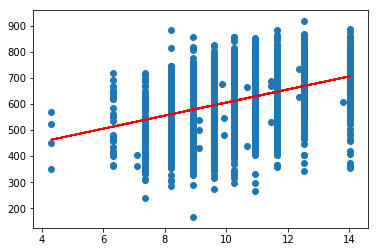

In [75]:
x = TIMSS['educational resources'].as_matrix()
y = TIMSS['math'].as_matrix()
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
print('%.3f' % fit[0]+' x +'+'%.2f' % fit[1])
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.show()

 -4.48018052308* x^3 + 27.1209357453* x^2 + -6.54621588138* x^1 + 540.147085579* x^0


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



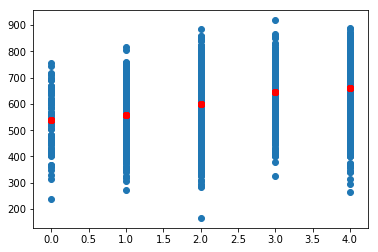

In [74]:
x = TIMSS['parental_education_n'].as_matrix()
y = TIMSS['math'].as_matrix()
fig, ax = plt.subplots()
deg = 3
fit = np.polyfit(x, y, deg=deg)
output_str = ' '
for d in range(deg+1):
    output_str += str(fit[d]) +'* x^'+str(deg-d) +' + '
#print('%.3f' % fit[0]+' x +'+'%.2f' % fit[1])
print(output_str[:-3])

#ax.plot(x, fit[0] * x + fit[1], color='red')
ax.hold(True)
ax.scatter(x, y)
ax.scatter(x, np.polyval(fit, x), color='red')

plt.show()

 -1.31503084528e-08* x^3 + 2.70370588266e-05* x^2 + -0.0141931317363* x^1 + 4.08930071197* x^0


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



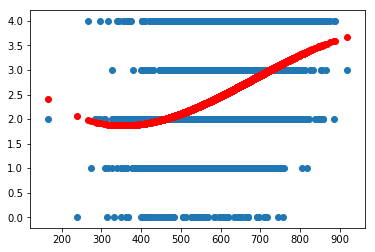

In [84]:
x = TIMSS['math'].as_matrix()
y = (TIMSS['parental_education_n']).as_matrix()
fig, ax = plt.subplots()
deg = 3
fit = np.polyfit(x, y, deg=deg)
output_str = ' '
for d in range(deg+1):
    output_str += str(fit[d]) +'* x^'+str(deg-d) +' + '
#print('%.3f' % fit[0]+' x +'+'%.2f' % fit[1])
print(output_str[:-3])

#ax.plot(x, fit[0] * x + fit[1], color='red')
ax.hold(True)
ax.scatter(x, y)
ax.scatter(x, np.polyval(fit, x), color='red')

plt.show()

## 從上面可以看出高分的人群大部分集中在父母教育程度高的地方。

In [6]:
moore = sm.datasets.get_rdataset("Moore", "car", cache=True)

data = moore.data
data = data.rename(columns={"partner.status" :"partner_status"})  # make name pythonic
print(data)

moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame

print(table)

   partner_status  conformity fcategory  fscore
0             low           8       low      37
1             low           4      high      57
2             low           8      high      65
3             low           7       low      20
4             low          10       low      36
5             low           6       low      18
6             low          12    medium      51
7             low           4    medium      44
8             low          13       low      31
9             low          12       low      36
10            low           4    medium      42
11            low          13      high      56
12            low           7       low      28
13            low           9    medium      43
14            low           9      high      65
15            low          24      high      57
16            low           6       low      28
17            low           7      high      61
18            low          23      high      57
19            low          13      high 

In [22]:
try_T = TIMSS[['math', 'parental_education_n', 'math_hours_n']]
moore_lm = ols('math ~ C(parental_education_n, Sum)*C(math_hours_n, Sum)', data=try_T).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                                                         sum_sq      df  \
C(parental_education_n, Sum)                       5.292236e+06     4.0   
C(math_hours_n, Sum)                               8.131486e+05     2.0   
C(parental_education_n, Sum):C(math_hours_n, Sum)  1.083028e+05     8.0   
Residual                                           3.882713e+07  4452.0   

                                                            F         PR(>F)  
C(parental_education_n, Sum)                       151.704734  7.916980e-122  
C(math_hours_n, Sum)                                46.618665   9.180433e-21  
C(parental_education_n, Sum):C(math_hours_n, Sum)    1.552278   1.338551e-01  
Residual                                                  NaN            NaN  


## 可見parental_education_n的F十分大，PR(>F)遠小於0.05 --> 組間差異很大
## 同樣，math_hours的組間差異也很大